## **Logistic Regression Assignment**

## **Theory**

### **1. What is Logistic Regression, and how does it differ from Linear Regression?**
Logistic Regression is a classification algorithm used when the dependent variable is categorical where as Linear Regression can predicts continuous values. Logistic Regression predicts probabilities using the sigmoid function to map predictions to binary outputs (0 or 1).

### **2. What is the mathematical equation of Logistic Regression?**
In Logistic Regression, we model the **probability** that a given input $x$ belongs to class 1 (i.e., $P(y = 1 | x)$) using the **sigmoid (logistic) function** applied to a linear combination of input features:

$$ h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}} $$

Where:

* $h_\theta(x)$ is the predicted probability that $y = 1$ given input $x$
* $\theta$ is the vector of model parameters (weights)
* $x$ is the feature vector
* $\theta^T x$ is the dot product of $\theta$ and $x$

The decision boundary is typically at $h_\theta(x) = 0.5$, i.e.,

* If $h_\theta(x) \geq 0.5$, predict class **1**
* If $h_\theta(x) < 0.5$, predict class **0**

### **3. Why do we use the Sigmoid function in Logistic Regression**
The sigmoid function maps any real-valued number to a value between 0 and 1, which can be interpreted as a probability. This is essential for classification tasks.

### **4. What is the cost function of Logistic Regression**
The **cost function** in Logistic Regression is used to evaluate how well the model's predicted probabilities match the actual class labels. It is based on **log loss** or **binary cross-entropy**, defined as:

$$ J(\theta) = - \frac{1}{m} \sum_{i=1}^m [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))] $$

Where:

* $m$: Number of training examples
* $y^{(i)}$: Actual label (0 or 1) for example $i$
* $h_\theta(x^{(i)})$: Predicted probability that $y = 1$ given input $x^{(i)}$
* $\log$: Natural logarithm

### Intuition:
* If the prediction is close to the true label, the cost is low.
* If the prediction is far from the true label, the cost is high.
* The function penalizes confident but wrong predictions heavily.

### **5. What is Regularization in Logistic Regression? Why is it needed?**
Regularization is a technique to prevent overfitting by adding a penalty term to the cost function. It helps to keep the model weights small and generalizes better on unseen data.

### **6. Explain the difference between Lasso, Ridge, and Elastic Net regression.**
- **Lasso (L1)**: Adds absolute value of coefficients (sparse solutions).
- **Ridge (L2)**: Adds squared value of coefficients (shrinks coefficients).
- **Elastic Net**: Combines L1 and L2 penalties.

| Method      | Penalty Type | Feature Selection | Handles Multicollinearity | Coefficients Can Be Zero |
| ----------- | ------------ | ----------------- | ------------------------- | ------------------------ |
| Ridge       | L2           | No              | Yes                     | No                     |
| Lasso       | L1           | Yes             | No                     | Yes                    |
| Elastic Net | L1 + L2      | Yes             | Yes                     | Yes                    |


### **7. When should we use Elastic Net instead of Lasso or Ridge?**
Use **Elastic Net Regression** when you want to **combine the strengths of both Lasso and Ridge**, especially in the following scenarios:

#### **High-Dimensional Data (p > n)**
* When the number of features $p$ exceeds the number of samples $n$, Lasso may select too few features.
* Elastic Net provides a more stable selection by combining L1 and L2 penalties.

#### **Correlated Features**
* Lasso tends to select one feature from a group of correlated ones and ignore the rest.
* Ridge keeps all of them but does not perform feature selection.
* **Elastic Net** can select groups of correlated features together, which is often desired.

#### **Sparse + Grouping Effect**
* You want the **sparsity** of Lasso (i.e., feature selection) **and** the **grouping behavior** of Ridge (i.e., correlated features get similar coefficients).

#### **When Lasso or Ridge Alone Underperform**
* If Lasso underfits (too sparse) or Ridge overfits (no feature elimination), Elastic Net often performs better by tuning the balance between the two.

### **8. What is the impact of the regularization parameter (λ) in Logistic Regression?**
A higher λ means stronger regularization (smaller weights), which can reduce overfitting but may underfit if too strong.

### **9. What are the key assumptions of Logistic Regression**
- The dependent variable is binary.
- No multicollinearity among independent variables.
- Linearity between independent variables and log odds.

### **10. What are some alternatives to Logistic Regression for classification tasks?**
- Decision Trees
- Random Forests
- Support Vector Machines (SVM)
- k-Nearest Neighbors (k-NN)
- Neural Networks

### **11. What are Classification Evaluation Metrics?**
- Accuracy
- Precision
- Recall
- F1-Score
- ROC-AUC Score
- Confusion Matrix

### **12. How does class imbalance affect Logistic Regression?**
It can lead to a biased model that favors the majority class. Class imbalance occurs when one class significantly outnumbers the other(s) in a classification dataset (e.g., 95% class 0 and 5% class 1).
* Biased Predictions:
    - The model may predict the majority class more often to maximize accuracy.
    - This results in high accuracy but poor recall/precision for the minority class.

* Poor Learning of Minority Class:
    - The model may treat the minority class as noise.
    - Fails to learn distinguishing patterns for the underrepresented class.

* Misleading Evaluation Metrics:
    - Accuracy becomes unreliable because predicting the majority class alone gives high accuracy.
    - For example, predicting all "0" in a 95:5 class distribution gives 95% accuracy.

### **13. What is Hyperparameter Tuning in Logistic Regression?**
Hyperparameter tuning is the process of finding the optimal settings (hyperparameters) that control the behavior of a Logistic Regression model — before training begins.

| Hyperparameter | Description                                                                |
| -------------- | -------------------------------------------------------------------------- |
| `C`            | Inverse of regularization strength (smaller `C` = stronger regularization) |
| `penalty`      | Type of regularization: `'l1'`, `'l2'`, `'elasticnet'`, or `'none'`        |
| `solver`       | Optimization algorithm: `'liblinear'`, `'saga'`, `'lbfgs'`, `'newton-cg'`  |
| `max_iter`     | Maximum number of iterations for convergence                               |
| `class_weight` | Handling class imbalance (`None` or `'balanced'`)                          |


### **14. What are different solvers in Logistic Regression? Which one should be used?**
- **liblinear**: good for small datasets, supports L1.
- **saga**: supports all penalties and works with large datasets.
- **lbfgs**: fast for L2 penalty and multiclass classification.

| Solver        | Supports L1? | Supports L2? | Supports Elastic Net? | Handles Multiclass? | Suitable For         |
| ------------- | ------------ | ------------ | --------------------- | ------------------- | -------------------- |
| `'liblinear'` | Yes        | Yes        | No                  | OvR only          | Small datasets       |
| `'saga'`      | Yes        | Yes        | Yes                 | OvR & multinomial | Large + sparse data  |
| `'lbfgs'`     | No         | Yes        | No                  | OvR & multinomial | Medium to large data |
| `'newton-cg'` | No         | Yes        | No                  | OvR & multinomial | Large datasets       |
| `'sag'`       | No         | Yes        | No                  | OvR & multinomial | Large + sparse data  |


### **15. How is Logistic Regression extended for multiclass classification?**
By default, Logistic Regression is designed for binary classification (two classes). However, it can be extended to handle multiclass classification problems using the following strategies:
* One-vs-Rest (OvR) (a.k.a. One-vs-All)
    - Trains one binary classifier per class.
    - For class 𝑘, the classifier is trained to distinguish class 𝑘 vs. all other classes.
    - During prediction, the class with the highest confidence score is chosen.
* Multinomial (Softmax) Logistic Regression
    - Trains a single model to predict the probability distribution over all classes.
    - Uses the softmax function (generalization of sigmoid) in the final layer.

$$
P(y = k \mid x) = \frac{e^{\theta_k^T x}}{\sum_{j=1}^K e^{\theta_j^T x}}
$$


### **16. What are the advantages and disadvantages of Logistic Regression?**
**Advantages**:
- Simple and interpretable
- Efficient for binary classification

**Disadvantages**:
- Assumes linear relationship
- Poor performance with non-linear data

### **17. What are some use cases of Logistic Regression?**
- Spam detection
- Disease prediction
- Credit scoring
- Marketing (customer churn)

### **18. What is the difference between Softmax Regression and Logistic Regression?**
Here's a clear explanation of the difference between **Softmax Regression** and **Logistic Regression**:

#### Logistic Regression
* **Type:** Binary classifier.
* **Purpose:** Used when the target variable has **two classes** (e.g., yes/no, 0/1).
* **Output:** Produces a probability for the **positive class** using the logistic (sigmoid) function:
  $$
  P(y=1 \mid \mathbf{x}) = \frac{1}{1 + e^{-(\mathbf{w}^\top \mathbf{x} + b)}}
  $$
* **Decision:** Usually, if $P(y=1) > 0.5$, predict class 1; otherwise class 0.

#### Softmax Regression (Multinomial Logistic Regression)
* **Type:** Multiclass classifier.
* **Purpose:** Used when the target variable has **more than two classes** (e.g., 3 or more categories).
* **Output:** Produces a probability distribution over all classes using the **softmax function**:
  For $K$ classes, for class $j$:
  $$
  P(y=j \mid \mathbf{x}) = \frac{e^{\mathbf{w}_j^\top \mathbf{x} + b_j}}{\sum_{k=1}^K e^{\mathbf{w}_k^\top \mathbf{x} + b_k}}
  $$

* **Decision:** Predict the class with the highest probability.

### **19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?**
Choosing between **One-vs-Rest (OvR)** and **Softmax Regression** for multiclass classification depends on several factors like model complexity, performance, and dataset characteristics. Here’s a clear comparison and guidance on how to choose:

#### One-vs-Rest (OvR) Approach

* What it is:
    Decomposes a multiclass problem into multiple binary classification problems. For $K$ classes, train $K$ binary classifiers, each distinguishing one class from the rest.

* How it works:
    Each classifier predicts the probability that the input belongs to its class vs. all others. At prediction time, choose the class with the highest classifier score.

* Advantages:
  * Simpler to implement, especially if you already have a binary classifier.
  * Can use different classifiers for each class.
  * Sometimes works better with imbalanced classes.
  * Training can be parallelized easily since classifiers are independent.

* Disadvantages:
  * Classifiers are trained independently, so probabilities might not be well calibrated.
  * Might produce inconsistent predictions because classifiers are separate.
  * Potentially slower at prediction time (needs to run $K$ classifiers).

#### Softmax (Multinomial Logistic Regression)

* What it is:
  A single model that directly predicts the probability distribution over all classes using the softmax function.

* How it works:
  Trains one model with parameters for all classes simultaneously, optimizing the multinomial likelihood.

* Advantages:
  * Probabilities are normalized and consistent across classes.
  * Often better performance since it models classes jointly.
  * Generally better when classes are mutually exclusive.
  * More mathematically elegant and efficient at prediction time (just one forward pass).
* Disadvantages:
  * Slightly more complex to implement and optimize.
  * Can be less flexible if classes are not mutually exclusive.
  * Training can be slower and more memory-intensive for very large $K$.


### **20. How do we interpret coefficients in Logistic Regression?**
In **Logistic Regression**, the coefficients represent the **impact of each feature** on the **log-odds** of the outcome.
Logistic Regression models the **log-odds** (also called the logit) of the probability that the dependent variable equals 1:
$$
\log\left(\frac{P(y=1)}{1 - P(y=1)}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$
* $\beta_0$: Intercept
* $\beta_i$: Coefficient for feature $x_i$
* **Sign**:
  * If $\beta_i > 0$: Increasing $x_i$ increases the **log-odds** of the positive class (i.e., increases the probability of $y = 1$).
  * If $\beta_i < 0$: Increasing $x_i$ **decreases** the probability of $y = 1$.
* **Magnitude**:
  * Larger absolute values mean a **stronger effect** on the outcome.
* **Exponentiated Coefficient** $e^{\beta_i}$:
  * This gives the **odds ratio** for a **1-unit increase** in $x_i$, holding all other variables constant.
  * If $e^{\beta_i} = 1.5$, then a 1-unit increase in $x_i$ multiplies the odds of $y = 1$ by 1.5.
  * If $e^{\beta_i} = 0.6$, then a 1-unit increase in $x_i$ multiplies the odds by 0.6 (i.e., lowers the odds).

## **Practical**

### **1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy?**

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.956140350877193


### **2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy?**

In [3]:
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000)
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)
print("L1 Regularized Accuracy:", accuracy_score(y_test, y_pred_l1))

L1 Regularized Accuracy: 0.956140350877193


### **3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients?**

In [4]:
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
print("L2 Regularized Accuracy:", accuracy_score(y_test, y_pred_l2))
print("Coefficients:", model_l2.coef_)

L2 Regularized Accuracy: 0.956140350877193
Coefficients: [[ 2.04354028e+00  1.50727651e-01 -1.21865250e-01 -1.40712354e-03
  -1.32867463e-01 -4.01738361e-01 -6.18552774e-01 -3.20877196e-01
  -1.95151233e-01 -2.94653873e-02 -4.38412463e-02  1.43445492e+00
  -2.90303534e-01 -7.31190089e-02 -1.44981250e-02 -9.69515060e-03
  -4.97155954e-02 -3.54239504e-02 -3.98113534e-02  4.23459422e-03
   1.20942508e+00 -3.99652497e-01 -4.43667770e-02 -2.63631821e-02
  -2.44521885e-01 -1.18358468e+00 -1.55571752e+00 -5.78440045e-01
  -6.97654198e-01 -1.15249374e-01]]


### **4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')?**

In [5]:
model_en = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=10000)
model_en.fit(X_train, y_train)
y_pred_en = model_en.predict(X_test)
print("Elastic Net Accuracy:", accuracy_score(y_test, y_pred_en))

Elastic Net Accuracy: 0.9736842105263158


### **5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'.**

In [8]:
model_ovr = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=10000)
model_ovr.fit(X_train, y_train)
print("OvR Accuracy:", accuracy_score(y_test, model_ovr.predict(X_test)))

OvR Accuracy: 0.956140350877193


### **6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy.**

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Accuracy after tuning:", accuracy_score(y_test, grid.predict(X_test)))


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy after tuning: 0.956140350877193


### **7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy.**

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(LogisticRegression(max_iter=10000), X, y, cv=skf)
print("Stratified K-Fold Average Accuracy:", scores.mean())

Stratified K-Fold Average Accuracy: 0.9507995652848935


### **8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.**

In [35]:
import pandas as pd

df = pd.read_csv("framingham.csv")
df = df.dropna()
X = df.drop("target", axis=1)
y = df["target"]

model = LogisticRegression(max_iter=10000)
model.fit(X, y)
print("Accuracy:", accuracy_score(y, model.predict(X)))

Accuracy: 0.8555798687089715


### **9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy.**

In [12]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

random_search = RandomizedSearchCV(LogisticRegression(max_iter=10000), param_dist, n_iter=5, cv=3)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", accuracy_score(y_test, random_search.predict(X_test)))

Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1}
Best Accuracy: 0.956140350877193


### **10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.**

In [13]:
from sklearn.multiclass import OneVsOneClassifier

ovo_model = OneVsOneClassifier(LogisticRegression(max_iter=10000))
ovo_model.fit(X_train, y_train)
print("OvO Accuracy:", accuracy_score(y_test, ovo_model.predict(X_test)))

OvO Accuracy: 0.956140350877193


### **11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.**

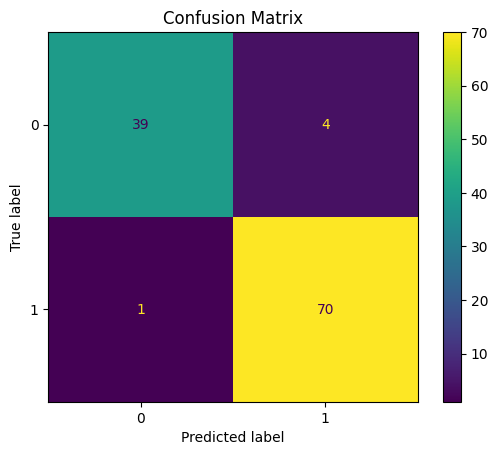

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

### **12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score.**

In [16]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1 Score: 0.9655172413793104


### **13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.**

In [17]:
model_balanced = LogisticRegression(class_weight='balanced', max_iter=10000)
model_balanced.fit(X_train, y_train)
print("Balanced Class Accuracy:", accuracy_score(y_test, model_balanced.predict(X_test)))


Balanced Class Accuracy: 0.9736842105263158


### **14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance.**

In [18]:
import seaborn as sns
titanic = sns.load_dataset("titanic")

titanic = titanic[["survived", "pclass", "sex", "age"]].dropna()
titanic["sex"] = titanic["sex"].map({"male": 0, "female": 1})

X = titanic[["pclass", "sex", "age"]]
y = titanic["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
print("Titanic Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Titanic Accuracy: 0.7988826815642458


### **15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling.**

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_raw = LogisticRegression(max_iter=10000)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
raw_accuracy = accuracy_score(y_test, y_pred_raw)
print("Accuracy without Scaling:", raw_accuracy)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=10000)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
scaled_accuracy = accuracy_score(y_test, y_pred_scaled)
print("Accuracy with Scaling:", scaled_accuracy)

improvement = scaled_accuracy - raw_accuracy
print(f"Improvement in Accuracy: {improvement:.4f}")


Accuracy without Scaling: 0.956140350877193
Accuracy with Scaling: 0.9736842105263158
Improvement in Accuracy: 0.0175


### **16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.**

In [19]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


ROC-AUC Score: 0.8567948717948718


### **17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.**

In [20]:
model_custom_c = LogisticRegression(C=0.5, max_iter=10000)
model_custom_c.fit(X_train, y_train)
print("Accuracy with C=0.5:", accuracy_score(y_test, model_custom_c.predict(X_test)))

Accuracy with C=0.5: 0.7988826815642458


### **18. Write a Python program to train Logistic Regression and identify important features based on model coefficients.**

In [21]:
importance = model.coef_[0]
for feature, coef in zip(data.feature_names, importance):
    print(f"{feature}: {coef}")

mean radius: -1.1518502613873867
mean texture: 2.463260405141402
mean perimeter: -0.02899692912636335


### **19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score.**

In [28]:
from sklearn.metrics import cohen_kappa_score

print("Cohen's Kappa Score:", cohen_kappa_score(y_test, y_pred))

Cohen's Kappa Score: 0.9053470607771504


### **20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classificatio.**

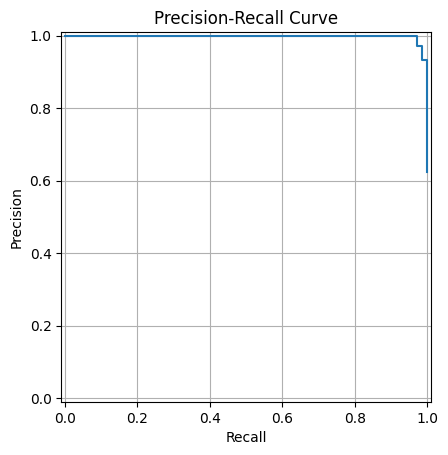

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_scores = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()


### **21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.**

In [31]:
for solver in ['liblinear', 'lbfgs', 'saga']:
    model = LogisticRegression(solver=solver, max_iter=10000)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{solver} solver accuracy: {acc}")


liblinear solver accuracy: 0.956140350877193
lbfgs solver accuracy: 0.956140350877193
saga solver accuracy: 0.9736842105263158


### **22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC).**

In [32]:
from sklearn.metrics import matthews_corrcoef

print("Mattews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred))

Mattews Correlation Coefficient: 0.9068106119605033


### **23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling.**

In [23]:
from sklearn.preprocessing import StandardScaler

raw_model = LogisticRegression(max_iter=10000)
raw_model.fit(X_train, y_train)
raw_acc = accuracy_score(y_test, raw_model.predict(X_test))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaled_model = LogisticRegression(max_iter=10000)
scaled_model.fit(X_train_scaled, y_train)
scaled_acc = accuracy_score(y_test, scaled_model.predict(X_test_scaled))

print("Raw Accuracy:", raw_acc)
print("Scaled Accuracy:", scaled_acc)

Raw Accuracy: 0.7988826815642458
Scaled Accuracy: 0.7988826815642458


### **24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.**

In [25]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Optimal C:", grid.best_params_['C'])

Optimal C: 1


### **25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.**

In [26]:
from joblib import dump, load

dump(model, "logreg_model.joblib")

loaded_model = load("logreg_model.joblib")
print("Loaded Model Accuracy:", accuracy_score(y_test, loaded_model.predict(X_test)))

Loaded Model Accuracy: 0.7988826815642458
